In [ ]:
import pandas as pd
df=pd.read_csv("/content/foodexpress_data_uncleaned - foodexpress_data_uncleaned.csv")
df.head()


,OrderID,OrderDate,OrderTime,City,CustomerSegment,CuisineType,RestaurantID,RestaurantRating,OrderValue,DeliveryFee,...,CashPayment,CardPayment,WalletPayment,UPIPayment,DiscountAmount,PromoDiscount,TipAmount,TimePeriod,WeatherCondition,DayOfWeek
0,5001,2024-09-21,11:01,East Zone,New Customer,Fast Food,136,3.1,23.94,1.69,...,23.94,0.00,0.0,0.00,1.96,0.0,3.33,Morning,Clear,Saturday
1,5002,2024-09-01,13:44,West Zone,Regular Customer,Mexican,140,4.6,18.58,4.58,...,0.00,18.58,0.0,0.00,2.71,0.0,3.40,Afternoon,Cloudy,Sunday
2,5003,2024-09-20,19:36,South Zone,VIP Customer,Chinese,112,4.3,79.19,9.53,...,0.00,79.19,0.0,0.00,2.49,0.0,0.00,Evening,Cloudy,Friday
3,5004,2024-09-30,10:38,South Zone,VIP Customer,Fast Food,142,4.7,39.85,8.91,...,0.00,0.00,0.0,39.85,0.19,0.0,0.00,Morning,Stormy,Monday
4,5005,2024-09-09,10:13,East Zone,New Customer,American,202,3.9,15.15,5.18,...,0.00,0.00,0.0,15.15,2.27,0.0,3.15,Morning,Rainy,Monday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OrderID                1000 non-null   int64  
 1   OrderDate              1000 non-null   object 
 2   OrderTime              1000 non-null   object 
 3   City                   1000 non-null   object 
 4   CustomerSegment        1000 non-null   object 
 5   CuisineType            1000 non-null   object 
 6   RestaurantID           1000 non-null   int64  
 7   RestaurantRating       925 non-null    float64
 8   OrderValue             1000 non-null   float64
 9   DeliveryFee            1000 non-null   float64
 10  DeliveryTime           930 non-null    float64
 11  DeliveryDistance       1000 non-null   float64
 12  CustomerRating         921 non-null    object 
 13  DeliveryPartnerRating  1000 non-null   float64
 14  CashPayment            1000 non-null   float64
 15  CardP

In [ ]:
df.columns

Index(['OrderID', 'OrderDate', 'OrderTime', 'City', 'CustomerSegment',
       'CuisineType', 'RestaurantID', 'RestaurantRating', 'OrderValue',
       'DeliveryFee', 'DeliveryTime', 'DeliveryDistance', 'CustomerRating',
       'DeliveryPartnerRating', 'CashPayment', 'CardPayment', 'WalletPayment',
       'UPIPayment', 'DiscountAmount', 'PromoDiscount', 'TipAmount',
       'TimePeriod', 'WeatherCondition', 'DayOfWeek'],
      dtype='object')

 **Write a Python program using a loop to calculate the total revenue (sum of all OrderValue amounts)
generated across all cities in the data set**

In [ ]:
total_revenue = 0

for value in df['OrderValue']:
    total_revenue += value

print(f"Total Revenue across all cities: ${total_revenue:.2f}")

Total Revenue across all cities: $35575.93


**Write a Python function that determines whether a delivery is classified as "Premium Delivery". A
delivery is considered "Premium" if:  
The delivery fee is greater than $5.00, AND  
The delivery time is less than 25 minutes  
The function should take an OrderID as input and return True if it meets the criteria, or False
otherwise.  
Function Signature:  
def is_premium_delivery(order_id):  
    Your code here  
pass**

In [ ]:
def is_premium_delivery(order_id):
    order = df[df['OrderID'] == order_id]

    if order.empty:
        return False  # OrderID not found

    delivery_fee = order.iloc[0]['DeliveryFee']
    delivery_time = order.iloc[0]['DeliveryTime']

    return (delivery_fee > 5.0) and (delivery_time < 25)


** 3. Python Functions: Average Order Value by Cuisine  

Write a Python function that takes a CuisineType (e.g., "Italian", "Chinese", "Fast Food") as input and
returns the average order value for that cuisine type.


Function Signature:  
def get_average_order_value(cuisine_type):  
Your code here  
pass


Example Usage:  
avg_value = get_average_order_value("Italian")  
print(f"Average order value for Italian cuisine: ${avg_value:.2f}")  **

In [ ]:
def get_average_order_value(cuisine_type):
    """
    Returns the average order value for a given cuisine type.
    """
    filtered_df = df[df['CuisineType'] == cuisine_type]

    if filtered_df.empty:
        return None  # or you can return 0

    return filtered_df['OrderValue'].mean()


In [ ]:
avg_value = get_average_order_value("Italian")

if avg_value is not None:
    print(f"Average order value for Italian cuisine: ${avg_value:.2f}")
else:
    print("Cuisine type not found in the dataset.")


Average order value for Italian cuisine: $37.10


 ### Section 3 Data Cleaning and Reshaping Questions (7 Questions

# 1.Handle Missing Values**

In [ ]:
df.isnull().sum()

,0
OrderID,0
OrderDate,0
OrderTime,0
City,0
CustomerSegment,0
CuisineType,0
RestaurantID,0
RestaurantRating,75
OrderValue,0
DeliveryFee,0


**missing value handling ,,numerical columns filled with mean and categorical value filled with mode**

In [ ]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns


df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
df.isnull().sum()

,0
OrderID,0
OrderDate,0
OrderTime,0
City,0
CustomerSegment,0
CuisineType,0
RestaurantID,0
RestaurantRating,0
OrderValue,0
DeliveryFee,0


 # 2.replace unclean data

Replace invalid values such as 99999 in the DeliveryTime column with the column median.  
Rationale: Delivery times of 99999 minutes are clearly data entry errors and should be treated as
outliers.  
Tasks:  
Identify how many rows contain the value 99999  
Replace these with the median delivery time  
Verify the replacement  

In [ ]:
df['DeliveryTime']

,DeliveryTime
0,16.0
1,25.0
2,47.0
3,64.0
4,27.0
...,...
995,20.0
996,16.0
997,41.0
998,38.0


In [ ]:
df['DeliveryTime'].describe()

,DeliveryTime
count,1000.000000
mean,1650.787097
std,12149.575007
min,6.000000
25%,24.000000
50%,37.000000
75%,54.000000
max,99999.000000


In [ ]:
invalid_count = (df['DeliveryTime'] == 99999).sum()
invalid_count


np.int64(15)

In [ ]:
median_delivery_time = df.loc[df['DeliveryTime'] != 99999, 'DeliveryTime'].median()
median_delivery_time


37.0

In [ ]:
#replacement
df['DeliveryTime'] = df['DeliveryTime'].replace(99999, median_delivery_time)


In [ ]:
#verify
(df['DeliveryTime'] == 99999).sum()


np.int64(0)

In [ ]:
df['DeliveryTime'].describe()


,DeliveryTime
count,1000.000000
mean,151.357097
std,412.238036
min,6.000000
25%,24.000000
50%,37.000000
75%,52.000000
max,1650.787097


# 3.clean non numeric values

Replace invalid strings like "INVALID" or "N/A" in the CustomerRating column with NaN , then handle
these missing values by imputing the median rating.
Tasks:  
Identify all non-numeric values in the CustomerRating column  
Replace them with NaN  
Impute missing values with the median  
Verify the data type is numeric

In [ ]:
df['CustomerRating'].unique()

array(['4.2', '3', '3.7', '4.1', '3.6', 'INVALID', '3.2', '3.1', '4.9',
       '4.7', '2.6', '4.5', '2.7', '4.8', '5', '2.8', '3.5', '4.3', '4',
       '3.9', '4.6', '4.4', '3.3', '2.5', '3.8', '3.4', '2.9', '---'],
      dtype=object)

In [ ]:
non_numeric_values = df[pd.to_numeric(df['CustomerRating'], errors='coerce').isna()]['CustomerRating'].unique()
non_numeric_values


array(['INVALID', '---'], dtype=object)

In [ ]:
df['CustomerRating'] = pd.to_numeric(df['CustomerRating'], errors='coerce')


In [ ]:
df['CustomerRating'].unique()

array([4.2, 3. , 3.7, 4.1, 3.6, nan, 3.2, 3.1, 4.9, 4.7, 2.6, 4.5, 2.7,
       4.8, 5. , 2.8, 3.5, 4.3, 4. , 3.9, 4.6, 4.4, 3.3, 2.5, 3.8, 3.4,
       2.9])

In [ ]:

median_rating = df['CustomerRating'].median()
df['CustomerRating'].fillna(median_rating, inplace=True)


/tmp/ipython-input-403192181.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerRating'].fillna(median_rating, inplace=True)


In [ ]:
df['CustomerRating'].unique()

array([4.2, 3. , 3.7, 4.1, 3.6, 3.8, 3.2, 3.1, 4.9, 4.7, 2.6, 4.5, 2.7,
       4.8, 5. , 2.8, 3.5, 4.3, 4. , 3.9, 4.6, 4.4, 3.3, 2.5, 3.4, 2.9])

# 4.fixed data type

Convert the following columns to appropriate data types:  
OrderDate → datetime  
CustomerRating → float (after cleaning)  
RestaurantRating → float (after cleaning)  
OrderValue → float  
DeliveryFee → float  
Task: Ensure all columns have correct data types for analysis and calculations.  

In [ ]:
import pandas as pd
import numpy as np

# Convert OrderDate to datetime
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')

# Clean and convert CustomerRating to float
# Replace non-numeric values (e.g., 'INVALID', 'N/A', etc.) with NaN
df['CustomerRating'] = pd.to_numeric(df['CustomerRating'], errors='coerce')

# Clean and ensure RestaurantRating is float
df['RestaurantRating'] = pd.to_numeric(df['RestaurantRating'], errors='coerce')

# Ensure OrderValue is float
df['OrderValue'] = df['OrderValue'].astype(float)

# Ensure DeliveryFee is float
df['DeliveryFee'] = df['DeliveryFee'].astype(float)

# Verify updated data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   OrderID                1000 non-null   int64         
 1   OrderDate              1000 non-null   datetime64[ns]
 2   OrderTime              1000 non-null   object        
 3   City                   1000 non-null   object        
 4   CustomerSegment        1000 non-null   object        
 5   CuisineType            1000 non-null   object        
 6   RestaurantID           1000 non-null   int64         
 7   RestaurantRating       1000 non-null   float64       
 8   OrderValue             1000 non-null   float64       
 9   DeliveryFee            1000 non-null   float64       
 10  DeliveryTime           1000 non-null   float64       
 11  DeliveryDistance       1000 non-null   float64       
 12  CustomerRating         1000 non-null   float64       
 13  Deli

In [ ]:
df[['OrderDate', 'CustomerRating', 'RestaurantRating','OrderValue','DeliveryFee']].dtypes


,0
OrderDate,datetime64[ns]
CustomerRating,float64
RestaurantRating,float64
OrderValue,float64
DeliveryFee,float64


# 5.remove outliers

Detect and remove rows where the DeliveryTime is unusually high (e.g., greater than the 99th
percentile) OR the OrderValue is unusually low (e.g., less than $5).  
Tasks:

Calculate the 99th percentile for DeliveryTime  
Identify orders with DeliveryTime > 99th percentile OR OrderValue <$5

Remove these outlier rows  
Report how many rows were removed

In [ ]:
#calulate the 99 percentail
deliverytime_99 = df['DeliveryTime'].quantile(0.99)
deliverytime_99


np.float64(1650.7870967741935)

In [ ]:
#calculate the outliers
outlier_condition = (df['DeliveryTime'] > deliverytime_99) | (df['OrderValue'] < 5)
outliers = df[outlier_condition]
outliers



,OrderID,OrderDate,OrderTime,City,CustomerSegment,CuisineType,RestaurantID,RestaurantRating,OrderValue,DeliveryFee,...,CashPayment,CardPayment,WalletPayment,UPIPayment,DiscountAmount,PromoDiscount,TipAmount,TimePeriod,WeatherCondition,DayOfWeek
10,5011,2024-09-02,20:46,East Zone,New Customer,Fast Food,150,3.9,3.15,4.89,...,0.00,11.78,0.00,0.00,0.09,0.98,3.74,Evening,Stormy,Monday
95,5096,2024-09-26,16:39,West Zone,New Customer,Fast Food,172,3.6,3.15,9.20,...,0.00,0.00,33.42,0.00,3.99,0.00,0.00,Afternoon,Rainy,Thursday
123,5124,2024-09-26,17:53,North Zone,Regular Customer,American,136,5.0,3.15,2.35,...,0.00,0.00,23.84,0.00,1.81,1.65,3.27,Evening,Rainy,Thursday
137,5138,2024-09-30,16:05,East Zone,Regular Customer,Chinese,196,3.2,3.15,5.60,...,0.00,28.87,0.00,0.00,0.34,0.00,0.00,Afternoon,Clear,Monday
193,5194,2024-09-05,23:00,North Zone,VIP Customer,Japanese,250,4.2,3.15,5.95,...,0.00,0.00,0.00,63.05,3.64,5.77,1.46,Night,Rainy,Thursday
285,5286,2024-09-05,8:04,North Zone,New Customer,American,212,4.9,3.15,9.51,...,0.00,11.70,0.00,0.00,0.74,0.45,0.00,Morning,Clear,Thursday
468,5469,2024-09-21,16:55,South Zone,Regular Customer,Fast Food,184,4.5,3.15,9.14,...,0.00,0.00,35.36,0.00,2.54,0.00,0.00,Afternoon,Rainy,Saturday
535,5536,2024-09-07,14:36,West Zone,VIP Customer,Thai,192,4.6,3.15,9.56,...,0.00,49.14,0.00,0.00,1.70,1.63,0.00,Afternoon,Clear,Saturday
547,5548,2024-09-01,22:02,East Zone,Regular Customer,Fast Food,205,3.5,3.15,7.60,...,24.68,0.00,0.00,0.00,1.83,0.00,0.00,Night,Clear,Sunday
704,5705,2024-09-07,18:57,East Zone,Regular Customer,Chinese,174,3.4,3.15,8.85,...,0.00,0.00,0.00,30.59,3.41,0.61,0.00,Evening,Clear,Saturday


In [ ]:
rows_removed = outlier_condition.sum()
rows_removed


np.int64(10)

In [ ]:
df_cleaned = df[~outlier_condition]
df_cleaned.head()


,OrderID,OrderDate,OrderTime,City,CustomerSegment,CuisineType,RestaurantID,RestaurantRating,OrderValue,DeliveryFee,...,CashPayment,CardPayment,WalletPayment,UPIPayment,DiscountAmount,PromoDiscount,TipAmount,TimePeriod,WeatherCondition,DayOfWeek
0,5001,2024-09-21,11:01,East Zone,New Customer,Fast Food,136,3.1,23.94,1.69,...,23.94,0.00,0.0,0.00,1.96,0.0,3.33,Morning,Clear,Saturday
1,5002,2024-09-01,13:44,West Zone,Regular Customer,Mexican,140,4.6,18.58,4.58,...,0.00,18.58,0.0,0.00,2.71,0.0,3.40,Afternoon,Cloudy,Sunday
2,5003,2024-09-20,19:36,South Zone,VIP Customer,Chinese,112,4.3,79.19,9.53,...,0.00,79.19,0.0,0.00,2.49,0.0,0.00,Evening,Cloudy,Friday
3,5004,2024-09-30,10:38,South Zone,VIP Customer,Fast Food,142,4.7,39.85,8.91,...,0.00,0.00,0.0,39.85,0.19,0.0,0.00,Morning,Stormy,Monday
4,5005,2024-09-09,10:13,East Zone,New Customer,American,202,3.9,15.15,5.18,...,0.00,0.00,0.0,15.15,2.27,0.0,3.15,Morning,Rainy,Monday


#Reshape Data Using Melt

In [ ]:
#define payment method columns
payment_cols = ['CashPayment', 'CardPayment', 'WalletPayment', 'UPIPayment']
payment_cols


['CashPayment', 'CardPayment', 'WalletPayment', 'UPIPayment']

In [ ]:
df_long = pd.melt(
    df,
    id_vars=['OrderID'],              # keep OrderID as identifier
    value_vars=payment_cols,          # payment method columns
    var_name='PaymentMethod',         # new column for method
    value_name='PaymentAmount'        # new column for amount
)

#filter payment
df_long = df_long[df_long['PaymentAmount'] > 0]
df_long.head()



,OrderID,PaymentMethod,PaymentAmount
0,5001,CashPayment,23.94
6,5007,CashPayment,71.29
7,5008,CashPayment,27.76
12,5013,CashPayment,52.66
16,5017,CashPayment,29.14


# Section 4: Visualization Questions (6 Questions)

### 1. Bar Chart: Total Orders by Cuisine Type  

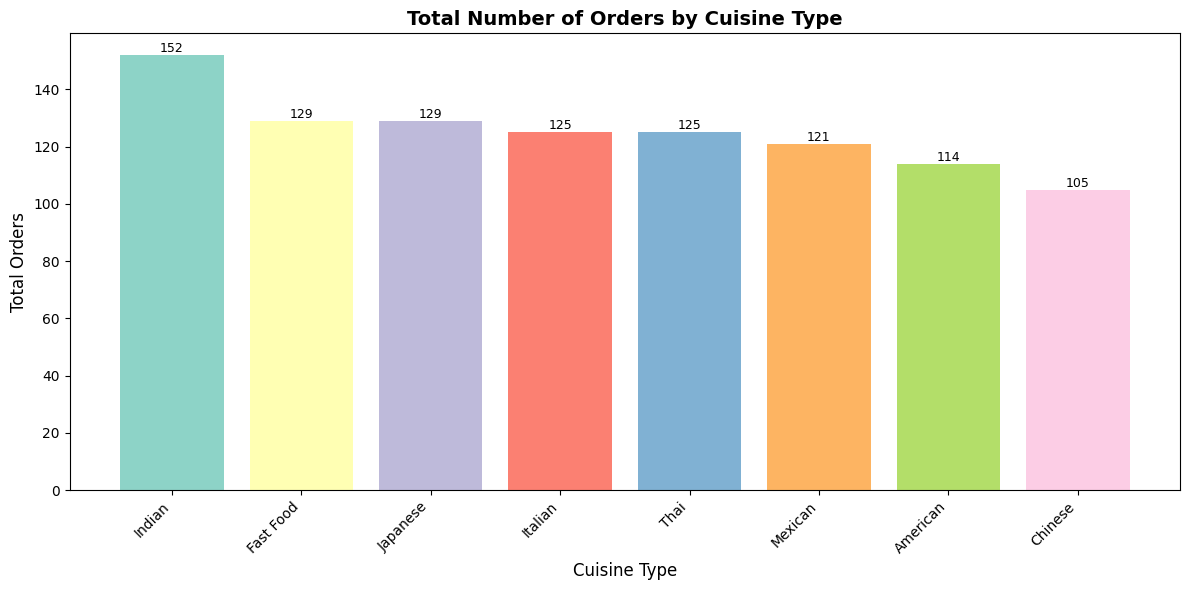

In [ ]:
import matplotlib.pyplot as plt

# Count total orders for each cuisine type
cuisine_counts = df['CuisineType'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))

# Use a colormap for different colors
colors = plt.cm.Set3(range(len(cuisine_counts)))

plt.bar(cuisine_counts.index, cuisine_counts.values, color=colors)

# Add title and axis labels
plt.title('Total Number of Orders by Cuisine Type', fontsize=14, fontweight='bold')
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Total Orders', fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of bars
for index, value in enumerate(cuisine_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


Here is a **concise and professional version**:

---

## Cuisine Performance Summary

The analysis shows clear variation in customer demand across cuisine types. **Indian cuisine** leads with the highest number of orders (**152**), making it the strongest performer. **Fast Food and Japanese cuisines** follow closely (**129 orders each**), while **Italian and Thai cuisines** also demonstrate steady demand (**125 orders each**). **Mexican cuisine** shows moderate performance (**121 orders**).

In contrast, **American (114)** and **Chinese (105)** cuisines record the lowest order volumes, indicating relatively weaker demand.

### Business Insight

Indian cuisine is a key revenue driver, while mid-performing cuisines offer growth opportunities through targeted promotions. Lower-performing cuisines may require menu or pricing adjustments to improve customer interest.

---


# 2. Histogram: Delivery Time Distribution

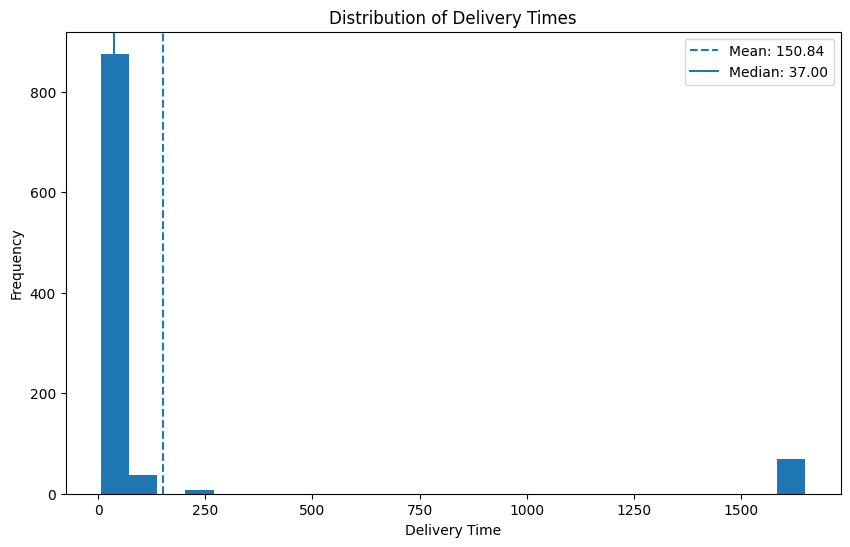

In [ ]:

# Calculate mean and median
mean_time = df_cleaned['DeliveryTime'].mean()
median_time = df_cleaned['DeliveryTime'].median()

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned['DeliveryTime'], bins=25)

# Add mean and median lines
plt.axvline(mean_time, linestyle='--', label=f'Mean: {mean_time:.2f}')
plt.axvline(median_time, linestyle='-', label=f'Median: {median_time:.2f}')

# Add title and labels
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')

# Add legend
plt.legend()

plt.show()


In [ ]:
[df_cleaned['DeliveryTime'].min(), df_cleaned['DeliveryTime'].max()]

[6.0, 1650.7870967741935]

#3. Pie Chart: Customer Segment Proportion

In [ ]:
df['CustomerSegment'].unique()

array(['New Customer', 'Regular Customer', 'VIP Customer'], dtype=object)

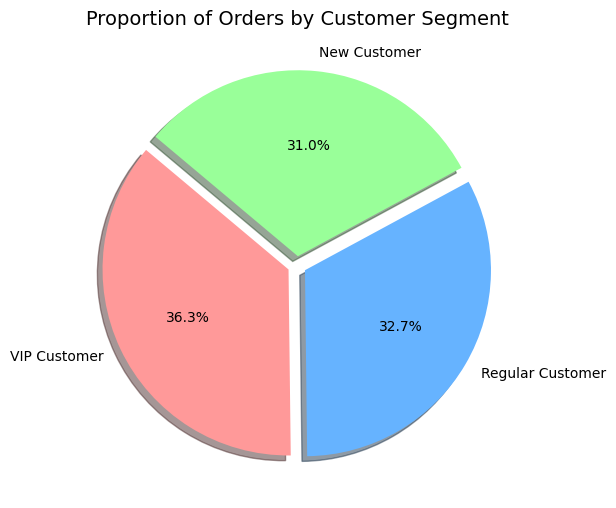

In [ ]:


# Example: count of orders per customer segment
# Replace this with your actual dataframe counts
customer_counts = df['CustomerSegment'].value_counts()

# Define contrasting colors
colors = ['#ff9999','#66b3ff','#99ff99']

# Create pie chart
plt.figure(figsize=(6, 8))
plt.pie(customer_counts,
        labels=customer_counts.index,
        autopct='%1.1f%%',  # Show percentages
        colors=colors,
        startangle=140,      # Rotate start for better visibility
        explode=(0.05, 0.05, 0.05),  # Slightly separate slices
        shadow=True)

# Add title
plt.title('Proportion of Orders by Customer Segment', fontsize=14)

# Display the chart
plt.show()


**Interpretation & Business Insights (Concise):**

* **VIP Customers (36.3%)** generate the largest share of orders → they are the core revenue drivers.
* **Regular Customers (32.7%)** contribute steadily → strong base with potential to upgrade.
* **New Customers (31.0%)** form a significant portion → acquisition efforts are effective.

**Actionable Insights:**

* Prioritize **retention and loyalty programs** for VIPs to protect revenue.
* Use **targeted promotions and tiered benefits** to convert Regular customers into VIPs.
* Continue **customer acquisition**, but focus on **onboarding strategies** to quickly move New customers toward repeat purchases.

Overall, the mix is healthy, but **maximizing lifetime value through retention and upselling** will drive the biggest growth.


# 4. Scatterplot: Order Value vs. Delivery Time

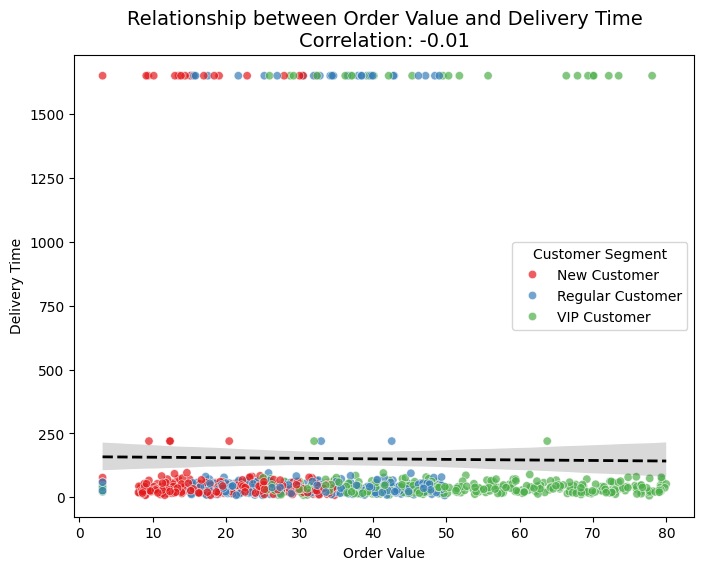

In [ ]:
import seaborn as sns
import numpy as np

# Calculate correlation coefficient
corr = df['OrderValue'].corr(df['DeliveryTime'])

# Set figure size
plt.figure(figsize=(8, 6))

# Scatterplot with trend line
sns.scatterplot(data=df,
                x='OrderValue',
                y='DeliveryTime',
                hue='CustomerSegment',
                palette='Set1',  # Distinct colors for segments
                alpha=0.7)

# Add regression trend line
sns.regplot(data=df,
            x='OrderValue',
            y='DeliveryTime',
            scatter=False,
            color='black',
            line_kws={'linewidth':2, 'linestyle':'--'})

# Add title with correlation coefficient
plt.title(f'Relationship between Order Value and Delivery Time\nCorrelation: {corr:.2f}', fontsize=14)

# Axis labels
plt.xlabel('Order Value')
plt.ylabel('Delivery Time')

# Show legend
plt.legend(title='Customer Segment')

# Display the plot
plt.show()



1. **X-axis (Order Value) vs Y-axis (Delivery Time):**

   * Each point represents an order.
   * OrderValue is the cost of the order, DeliveryTime is how long it took to deliver.

2. **Color by Customer Segment:**

   * Red = New Customer
   * Blue = Regular Customer
   * Green = VIP Customer

3. **Trend line and correlation (-0.01):**

   * The dashed black line is a regression trend line.
   * Correlation coefficient is **-0.01**, which is very close to 0.
   * This means there is **essentially no linear relationship** between order value and delivery time. Higher or lower order values don’t consistently result in longer or shorter delivery times.

4. **Observations from the plot:**

   * Most delivery times are clustered at lower values (under ~200 minutes), but there are some **very high delivery times** (over 1500 minutes), which are likely outliers.
   * Points are scattered across order values, showing no clear pattern.
   * Customer segments seem spread out similarly, meaning **all types of customers experience a wide range of delivery times**.



# 5. Boxplot: Delivery Time by City

In [ ]:
df['City'].unique()

array(['East Zone', 'West Zone', 'South Zone', 'North Zone'], dtype=object)

/tmp/ipython-input-1681610949.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


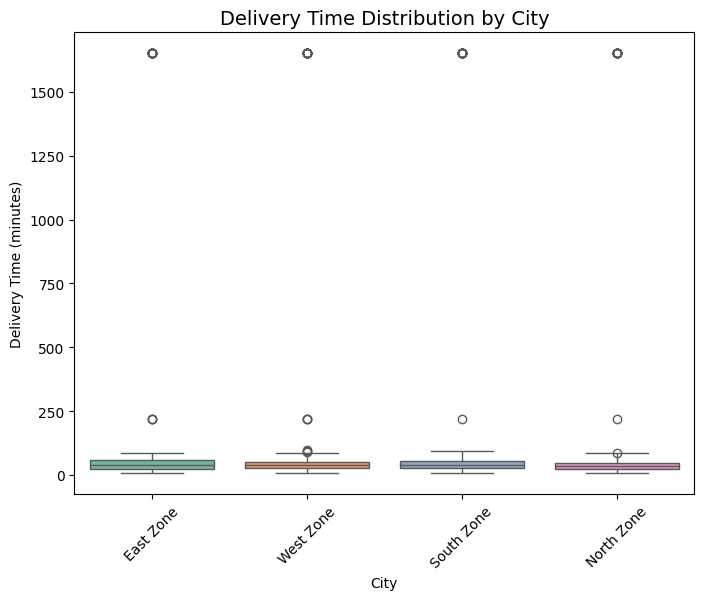

In [ ]:

# Set figure size
plt.figure(figsize=(8, 6))

# Create boxplot
sns.boxplot(data=df,
            x='City',
            y='DeliveryTime',
            palette='Set2',   # Colorful palette for cities
            showfliers=True)  # Show outliers

# Add title and labels
plt.title('Delivery Time Distribution by City', fontsize=14)
plt.xlabel('City')
plt.ylabel('Delivery Time (minutes)')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()


This is a **box plot** showing the **distribution of delivery times (in minutes) by city zones** (East, West, South, North). Here's a detailed breakdown and insights:

---

### 1. **Understanding the plot**

* **Boxes:** Represent the interquartile range (IQR) – the middle 50% of delivery times.
* **Lines inside boxes:** Medians of delivery times.
* **Whiskers:** Represent the typical range of delivery times excluding extreme outliers.
* **Dots outside whiskers:** Outliers – unusually high delivery times (like 1500 minutes in this case, which is extremely high).

**Observations from the plot:**

* The median delivery time is roughly similar across all zones (~30–50 minutes).
* The IQR (spread of the middle 50% of orders) is also similar across zones.
* There are **severe outliers** (extremely delayed deliveries, e.g., ~1500 minutes) in all zones.
* Some moderate outliers (~100–200 minutes) are present, indicating occasional late deliveries.

---

### 2. **Business insights**

1. **Consistent median delivery time:**

   * Most zones perform similarly in terms of typical delivery speed.
   * Good for benchmarking; no single zone is significantly faster.

2. **High outliers indicate operational issues:**

   * Orders taking unusually long (e.g., 1500 minutes ~25 hours) suggest errors in processing, data recording, or exceptional delays.
   * These should be investigated because they affect customer experience.

3. **Focus on late deliveries:**

   * Moderate outliers (100–200 minutes) show some deliveries are consistently delayed.
   * Identify the cause: traffic, kitchen delays, or logistics.

4. **Opportunity for improvement:**

   * Reduce variability: aim to shrink the IQR and eliminate extreme outliers.
   * Customer satisfaction improves when delivery times are predictable.

5. **Targeted interventions:**

   * Since all zones have similar patterns, standard operational improvements (better routing, optimized dispatch) can be applied across zones.
   * Investigate outlier cases zone-wise to identify root causes.

---



# 6. Line Chart: Daily Order Trends

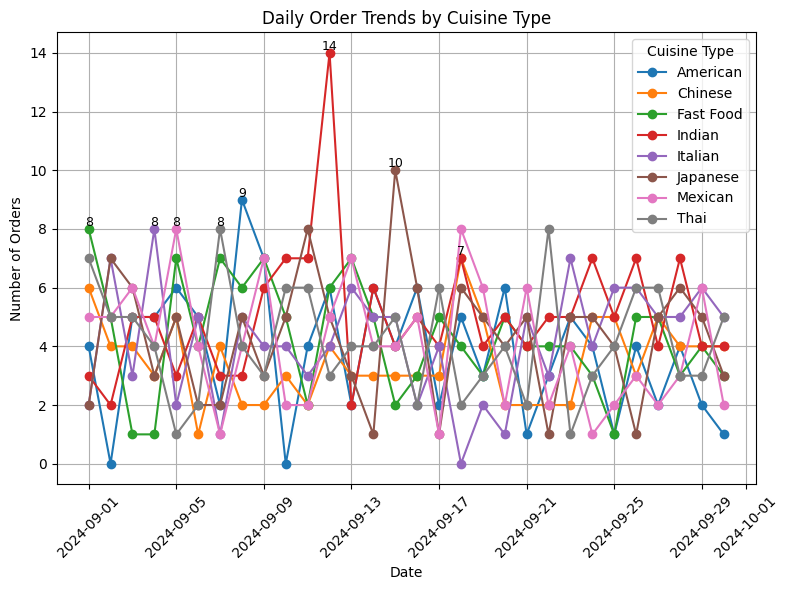

In [ ]:


# Count daily orders for each CuisineType
daily_orders = df.groupby(['OrderDate', 'CuisineType']).size().unstack(fill_value=0)

# Plot the line chart
plt.figure(figsize=(8, 6))
for cuisine in daily_orders.columns:
    plt.plot(daily_orders.index, daily_orders[cuisine], marker='o', label=cuisine)

# Highlight peak ordering days for each cuisine
for cuisine in daily_orders.columns:
    peak_day = daily_orders[cuisine].idxmax()
    peak_value = daily_orders[cuisine].max()
    plt.text(peak_day, peak_value, f'{peak_value}', fontsize=9, ha='center', va='bottom')

# Customize chart
plt.title('Daily Order Trends by Cuisine Type')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Cuisine Type')
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretation & Business Insights**

* **Overall Demand:** Orders are relatively stable across the month with moderate daily fluctuations—no strong seasonality, but consistent demand.
* **Top Performers:**

  * **Indian cuisine** shows the highest spikes (notably a peak around mid-month), indicating strong popularity and promotion potential.
  * **Thai and Mexican** maintain steady mid-to-high order volumes, suggesting loyal customer bases.
* **Stable Categories:**

  * **Italian and Japanese** show consistent but moderate demand—good candidates for reliable revenue with minimal volatility.
* **Lower/Variable Demand:**

  * **American and Chinese** cuisines show more variability and occasional low days, indicating sensitivity to pricing, promotions, or competition.
* **Operational Insights:**

  * Allocate **more inventory and staffing** to Indian, Thai, and Mexican during peak days.
  * Use **targeted promotions or bundles** to boost American and Chinese orders.
  * Maintain **consistent quality and availability** for Italian and Japanese to preserve steady sales.
* **Growth Opportunity:**

  * Replicate successful days of Indian cuisine (menu items, offers, or timing) across other cuisines to lift overall performance.

**Bottom line:** Focus growth strategies on high-performing cuisines while using promotions to stabilize and uplift weaker segments.


# Section 5: Statistical Test Questions (10 Questions)

# 1. Independent Samples T-Test: Premium vs. Regular Customers

In [ ]:
df['CustomerSegment'].unique()


array(['New Customer', 'Regular Customer', 'VIP Customer'], dtype=object)

In [ ]:
from scipy.stats import ttest_ind

# Separate ratings by customer segment
vip_ratings = df[df['CustomerSegment'] == 'VIP Customer']['CustomerRating'].dropna()
regular_ratings = df[df['CustomerSegment'] == 'Regular Customer']['CustomerRating'].dropna()


In [ ]:
t_stat, p_value = ttest_ind(vip_ratings, regular_ratings, equal_var=False)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.2f}")

T-statistic: -1.16, P-value: 0.25


In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis (H₀)")
else:
    print("Fail to reject the null hypothesis (H₀)")


Fail to reject the null hypothesis (H₀)


**Ratings are similar across segments**

* This indicates:

* Uniform service quality

* Strong operational consistency

No immediate need for segment-specific changes

/tmp/ipython-input-4248443760.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


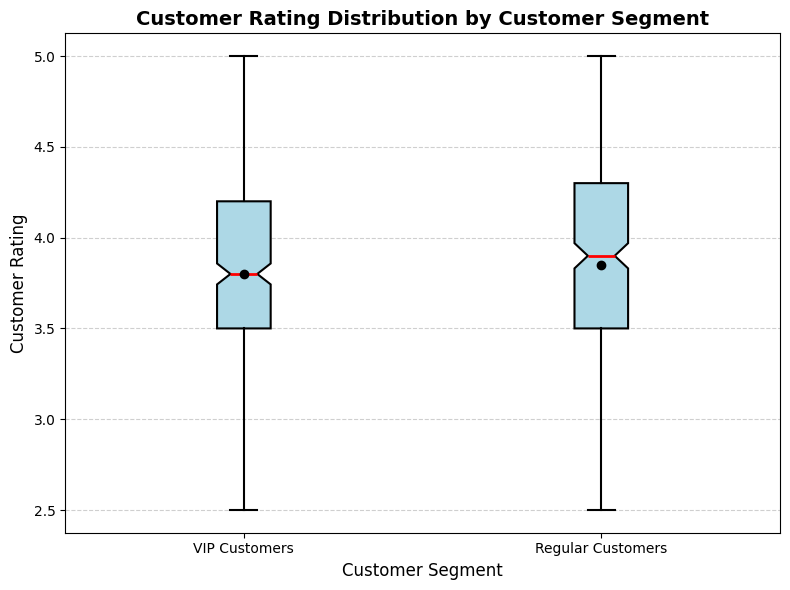

In [ ]:



plt.figure(figsize=(8, 6))

plt.boxplot(
    [vip_ratings, regular_ratings],
    labels=['VIP Customers', 'Regular Customers'],
    patch_artist=True,
    showmeans=True,
    notch=True,
    boxprops=dict(facecolor='lightblue', linewidth=1.5),
    medianprops=dict(color='red', linewidth=2),
    meanprops=dict(marker='o', markerfacecolor='black', markeredgecolor='black'),
    whiskerprops=dict(linewidth=1.5),
    capprops=dict(linewidth=1.5),
    flierprops=dict(marker='x', markeredgecolor='gray', alpha=0.6)
)

plt.title('Customer Rating Distribution by Customer Segment', fontsize=14, fontweight='bold')
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Customer Rating', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()



This **boxplot compares customer ratings between VIP and Regular customers**.
---

##  How to read this boxplot

For **each customer segment (VIP vs Regular)**:

* **Box (light blue)** → Middle 50% of ratings (from 25th to 75th percentile)
* **Red line inside box** → **Median rating** (middle value)
* **Black dot** → **Mean (average) rating**
* **Whiskers** → Typical minimum and maximum ratings (excluding outliers)
* **Notch** → Confidence interval around the median

  * If notches overlap → medians are likely similar

---

## What this specific plot shows

### 1. Overall rating level

* Both **VIP and Regular customers rate around 3.8–3.9**
* This means **general satisfaction is good** for both groups

---

###  2. Median comparison

* **Regular customers have a slightly higher median rating**
* Difference is small → satisfaction level is **very similar**

---

### 3. Rating consistency (spread)

* VIP customers:

  * Ratings are **slightly more concentrated**
  * Indicates **more consistent experiences**
* Regular customers:

  * Slightly **wider spread**
  * More variation in service experience

---

###  4. Mean vs median

* Mean (●) is very close to the median (red line)
* This means:

  * **No strong skew**
  * Ratings are fairly balanced (not heavily influenced by extremes)

---

###  5. Minimum & maximum ratings

* Both segments:

  * Minimum ≈ **2.5**
  * Maximum = **5**
* Shows that:

  * Some customers had poor experiences
  * Many customers gave **excellent ratings**

---

## Business insights
* VIP customers are **not dramatically more satisfied** than Regular ones
* Service quality is **consistent across segments**
* Improving low-end experiences (ratings ≈ 2.5) could boost overall satisfaction
* Loyalty benefits for VIPs may need strengthening to clearly differentiate them

---






# 2. One-Sample T-Test: Delivery Time Target

In [ ]:
df['City'].unique()

array(['East Zone', 'West Zone', 'South Zone', 'North Zone'], dtype=object)

In [ ]:
from scipy import stats
# Filter North Zone data
north_zone = df[df['City'] == 'North Zone']['DeliveryTime']

# Optional: drop missing values
north_zone = north_zone.dropna()


In [ ]:
# One-sample t-test
t_stat, p_value = stats.ttest_1samp(north_zone, popmean=30)

t_stat, p_value

(np.float64(4.13147978864909), np.float64(4.874292395776334e-05))

In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject H0: North Zone is NOT meeting the 30-minute target.")
else:
    print("Fail to reject H0: North Zone IS meeting the 30-minute target.")


Reject H0: North Zone is NOT meeting the 30-minute target.


There is statistically significant evidence that the average delivery time in the North Zone is different from 30 minutes.

**interpretation**
A one-sample t-test was conducted to determine whether the mean delivery time in the North Zone differs from the company target of 30 minutes.
The test produced a t-statistic of 4.13 and a p-value of  **4.87e-05**
Since the p-value is  less than 0.05, we reject the null hypothesis.
Therefore, the North Zone is not meeting the 30-minute delivery target.

 **Operational recommendations**

If mean delivery time > 30 minutes:

* Actionable improvements

* Increase delivery partner availability during peak hours

 * Optimize delivery routes using distance & traffic data

* Reduce restaurant preparation delays

* Introduce zone-based delivery incentives

* Monitor weather-related delays

# Chi-Square Tests

# 3. Chi-Square Test of Independence: Payment Method and Customer Segment  

In [ ]:
import numpy as np

payment_cols = ['CashPayment', 'CardPayment', 'WalletPayment', 'UPIPayment']

df['PaymentMethod'] = np.select(
    [
        df['CashPayment'] > 0,
        df['CardPayment'] > 0,
        df['WalletPayment'] > 0,
        df['UPIPayment'] > 0
    ],
    ['Cash', 'Card', 'Wallet', 'UPI'],
    default='Unknown'
)

payment_cols


['CashPayment', 'CardPayment', 'WalletPayment', 'UPIPayment']

In [ ]:
contingency_table = pd.crosstab(df['CustomerSegment'], df['PaymentMethod'])
contingency_table


PaymentMethod,Card,Cash,UPI,Wallet
CustomerSegment,,,,
New Customer,77,82,84,67
Regular Customer,84,75,98,70
VIP Customer,100,97,83,83


In [ ]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value, dof


(np.float64(5.20211974922005), np.float64(0.5181635325898712), 6)

In [ ]:
expected_df = pd.DataFrame(
    expected,
    index=contingency_table.index,
    columns=contingency_table.columns
)

expected_df


PaymentMethod,Card,Cash,UPI,Wallet
CustomerSegment,,,,
New Customer,80.910,78.740,82.150,68.20
Regular Customer,85.347,83.058,86.655,71.94
VIP Customer,94.743,92.202,96.195,79.86


In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject H₀: Payment method and customer segment are associated.")
else:
    print("Fail to reject H₀: No significant association found.")


Fail to reject H₀: No significant association found.


# 4. Chi-Square Goodness of Fit: Cuisine Distribution

In [ ]:
df['CuisineType'].value_counts()

,count
CuisineType,
Indian,152
Fast Food,129
Japanese,129
Italian,125
Thai,125
Mexican,121
American,114
Chinese,105


In [ ]:

# Count orders for the five cuisines
observed = df['CuisineType'].value_counts().loc[
    ['Italian', 'Chinese', 'Indian', 'Fast Food', 'Mexican']
]

observed


,count
CuisineType,
Italian,125
Chinese,105
Indian,152
Fast Food,129
Mexican,121


In [ ]:
total_orders = observed.sum()
expected = [total_orders * 0.20] * 5

expected


[np.float64(126.4),
 np.float64(126.4),
 np.float64(126.4),
 np.float64(126.4),
 np.float64(126.4)]

In [ ]:
from scipy.stats import chisquare

chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

chi_stat, p_value


(np.float64(9.10759493670886), np.float64(0.058465669331525194))

In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject H₀: Orders are NOT evenly distributed.")
else:
    print("Fail to reject H₀: Orders ARE evenly distributed.")


Fail to reject H₀: Orders ARE evenly distributed.




* Current marketing strategy is balanced

* No immediate change needed

**Recommendation**

* Maintain current promotional mix

* Monitor trends seasonally

# Correlation Analysis

### 5. Correlation Analysis: Order Value, Delivery Time, and Ratings

In [ ]:
from scipy.stats import pearsonr

# Define variable pairs
pairs = {
    "OrderValue vs CustomerRating": (df['OrderValue'], df['CustomerRating']),
    "DeliveryTime vs CustomerRating": (df['DeliveryTime'], df['CustomerRating']),
    "OrderValue vs DeliveryTime": (df['OrderValue'], df['DeliveryTime'])
}

# Compute correlations
results = {}

for name, (x, y) in pairs.items():
    corr, p_val = pearsonr(x, y)
    results[name] = {'Correlation': corr, 'p-value': p_val}

results


{'OrderValue vs CustomerRating': {'Correlation': np.float64(0.03098570377950496),
  'p-value': np.float64(0.32764742580024897)},
 'DeliveryTime vs CustomerRating': {'Correlation': np.float64(-0.05439959358853696),
  'p-value': np.float64(0.08554376695760864)},
 'OrderValue vs DeliveryTime': {'Correlation': np.float64(-0.009165285875922446),
  'p-value': np.float64(0.7722176258940776)}}

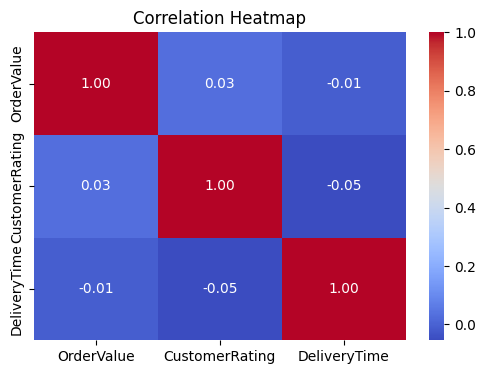

In [ ]:
# Select relevant columns
corr_df = df[['OrderValue', 'CustomerRating', 'DeliveryTime']]

# Correlation matrix
corr_matrix = corr_df.corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Order Value vs Customer Rating

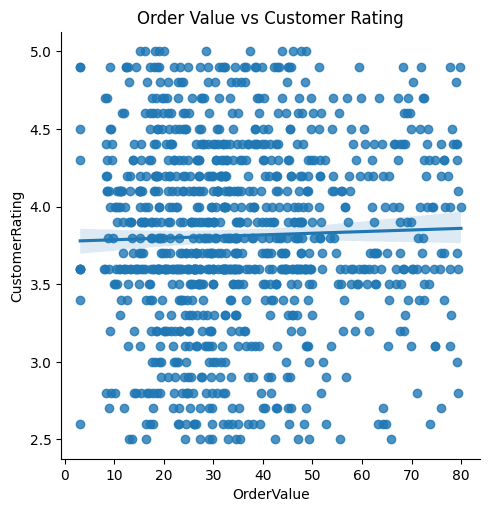

In [ ]:
sns.lmplot(x='OrderValue', y='CustomerRating', data=df)
plt.title('Order Value vs Customer Rating')
plt.show()


### Delivery Time vs Customer Rating

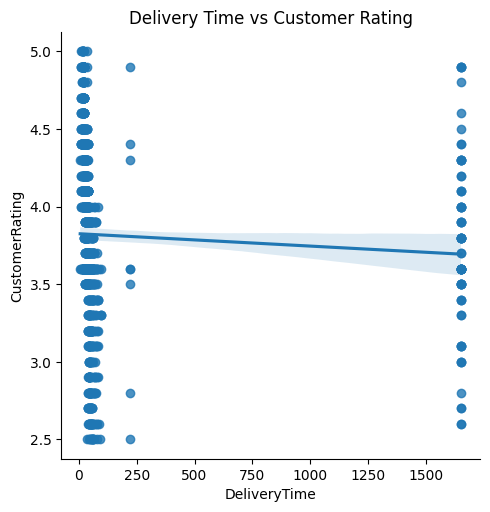

In [ ]:
sns.lmplot(x='DeliveryTime', y='CustomerRating', data=df)
plt.title('Delivery Time vs Customer Rating')
plt.show()


### Order Value vs Delivery Time

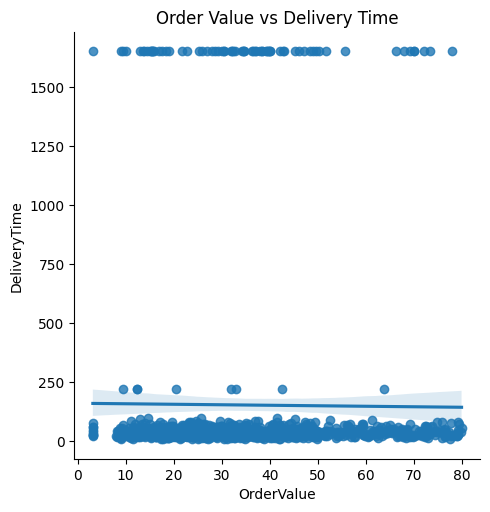

In [ ]:
sns.lmplot(x='OrderValue', y='DeliveryTime', data=df)
plt.title('Order Value vs Delivery Time')
plt.show()




## Correlation Analysis Interpretation

The correlation heatmap presents the Pearson correlation coefficients among **Order Value**, **Customer Rating**, and **Delivery Time**.

The analysis indicates **no strong linear relationships** between any of the examined variable pairs:

* **Order Value and Customer Rating (r = 0.03):**
  This negligible positive correlation suggests that higher order values do not significantly influence customer satisfaction. Customers who place higher-value orders are not more likely to provide higher ratings.

* **Order Value and Delivery Time (r = –0.01):**
  The near-zero correlation indicates that delivery time is largely independent of order value. Higher-value orders are delivered with similar efficiency as lower-value orders, reflecting consistency in operational performance.

* **Delivery Time and Customer Rating (r = –0.05):**
  This very weak negative relationship suggests that longer delivery times have a minimal impact on customer ratings. While delays may slightly affect satisfaction, delivery speed alone does not appear to be a primary determinant of customer perception in this dataset.

---

## Key Conclusions

Overall, the findings suggest that **customer satisfaction is not strongly driven by order value or delivery time**. The absence of meaningful correlations implies that other qualitative factors—such as food quality, order accuracy, packaging, and customer service—may play a more significant role in shaping customer ratings.

---

## Business Implications and Recommendations

* Maintain consistent delivery performance across all order sizes, as current operations do not show inefficiencies related to order value.
* Shift focus toward improving **service quality and customer experience factors** beyond pricing and delivery speed.
* Conduct further analysis by **customer segment, city, or cuisine type** to uncover hidden patterns that may not be visible in the overall dataset.

---



## 6. Multiple Correlation: Restaurant Rating Prediction

In [ ]:
df['DiscountPercentage'] = (df['DiscountAmount'] / df['OrderValue']) * 100
df['DiscountPercentage'] = df['DiscountPercentage'].replace([np.inf, -np.inf], np.nan)


In [ ]:
corr_values = df[['RestaurantRating',
                  'OrderValue',
                  'DeliveryTime',
                  'DiscountPercentage']].corr()

corr_values['RestaurantRating'].sort_values(ascending=False)


,RestaurantRating
RestaurantRating,1.000000
OrderValue,0.019131
DeliveryTime,0.008291
DiscountPercentage,0.006455


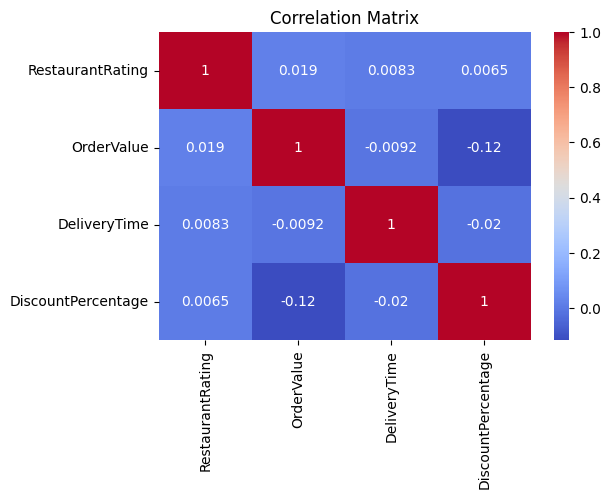

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_values, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

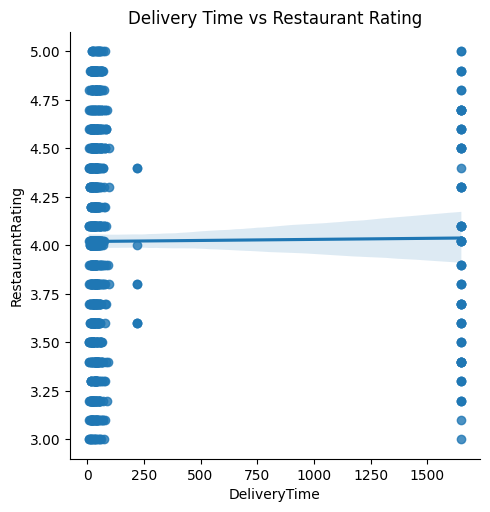

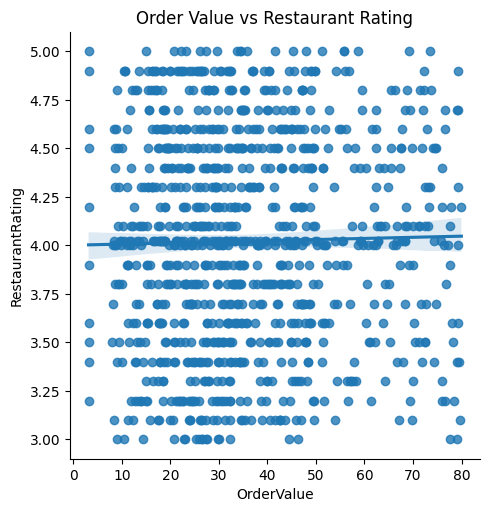

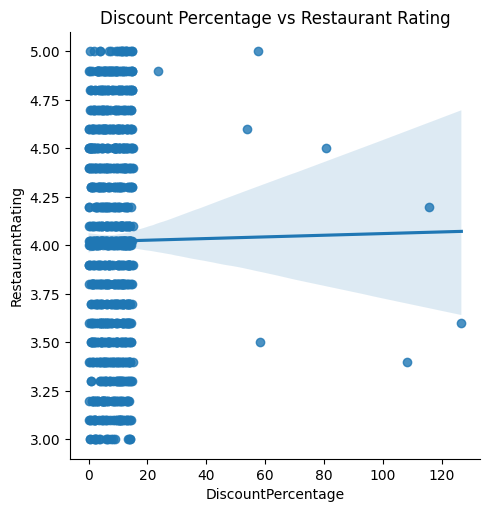

In [ ]:
sns.lmplot(x='DeliveryTime', y='RestaurantRating', data=df)
plt.title('Delivery Time vs Restaurant Rating')
plt.show()

sns.lmplot(x='OrderValue', y='RestaurantRating', data=df)
plt.title('Order Value vs Restaurant Rating')
plt.show()

sns.lmplot(x='DiscountPercentage', y='RestaurantRating', data=df)
plt.title('Discount Percentage vs Restaurant Rating')
plt.show()


# ANOVA Tests

## 7. One-Way ANOVA: Delivery Time Across Cities

In [ ]:

# Separate delivery times by city
north = df[df['City'] == 'North Zone']['DeliveryTime']
south = df[df['City'] == 'South Zone']['DeliveryTime']
east = df[df['City'] == 'East Zone']['DeliveryTime']
west = df[df['City'] == 'West Zone']['DeliveryTime']

# One-way ANOVA
f_stat, p_value = stats.f_oneway(north, south, east, west)

f_stat, p_value


(np.float64(0.9106177161580602), np.float64(0.43524034205901396))

### p-value ≥ 0.05 (Not Significant)

 * No sufficient evidence that delivery times differ across cities.
 * Post-hoc test not required.

<Figure size 800x500 with 0 Axes>

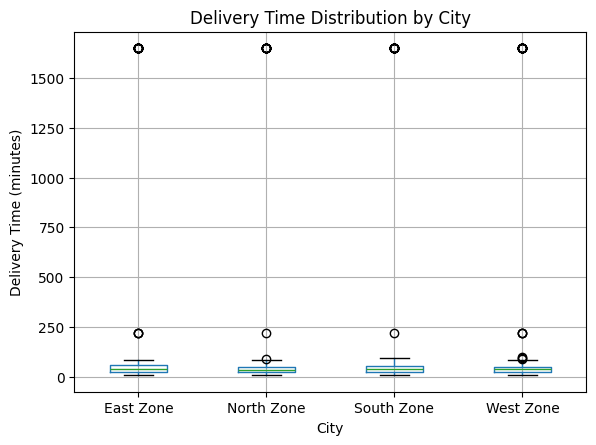

In [ ]:
# box plot
plt.figure(figsize=(8, 5))
df.boxplot(column='DeliveryTime', by='City')
plt.title('Delivery Time Distribution by City')
plt.suptitle('')
plt.xlabel('City')
plt.ylabel('Delivery Time (minutes)')
plt.show()

The boxplot indicates that delivery time distributions across all four cities are largely similar in terms of median and variability. While extreme outliers are observed in each city, the overall consistency suggests no substantial city-level differences in typical delivery performance. These findings support the null hypothesis that mean delivery times do not differ significantly across cities, pending confirmation through ANOVA testing.

**Business insights**


* Investigate traffic congestion

* Optimize delivery partner allocation

* Improve route planning

* Increase delivery staff during peak hours

# Paired T-Tests

## 9. Paired T-Test: Weekend vs. Weekday Performance

In [ ]:
df['DayOfWeek'].unique()

array(['Saturday', 'Sunday', 'Friday', 'Monday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [ ]:

from scipy.stats import ttest_rel


# Create Weekend / Weekday column
df['DayType'] = df['DayOfWeek'].apply(
    lambda x: 'Weekend' if x in ['Friday','Saturday'] else 'Weekday'
)

# Average delivery time per partner per day type
partner_avg = df.groupby(['DeliveryPartnerRating', 'DayType'])['DeliveryTime'].mean().reset_index()

# Pivot to paired format
paired_data = partner_avg.pivot(
    index='DeliveryPartnerRating',
    columns='DayType',
    values='DeliveryTime'
)

# Drop partners who don't have both weekday & weekend data
paired_data = paired_data.dropna()

# Extract paired samples
weekday_times = paired_data['Weekday']
weekend_times = paired_data['Weekend']

# Paired t-test
t_stat, p_value = ttest_rel(weekday_times, weekend_times)

# Mean difference and standard error
mean_diff = (weekend_times - weekday_times).mean()
std_error = (weekend_times - weekday_times).std() / np.sqrt(len(paired_data))

t_stat, p_value, mean_diff, std_error


(np.float64(-0.8689640802612625),
 np.float64(0.39855783416954293),
 np.float64(31.158035613520884),
 np.float64(35.85652885002211))

**We fail to reject the null hypothesis (H₀).**

**Business Interpretation**

* Delivery partners perform consistently across weekdays and weekends

* Current weekend staffing and scheduling appear adequate

* No urgent need for weekend-specific operational changes based on delivery time alone

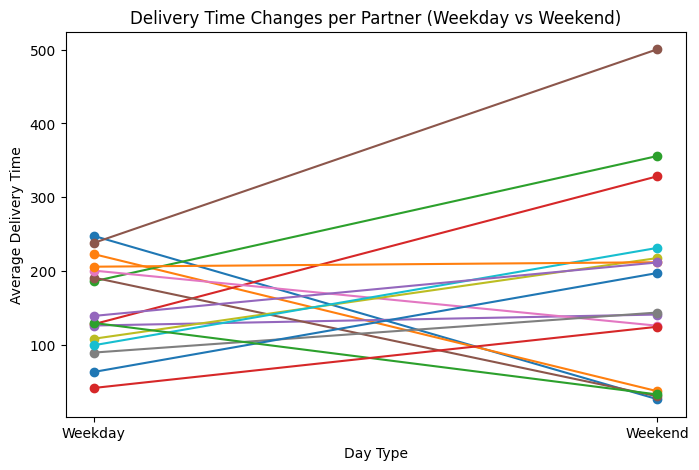

In [ ]:
plt.figure(figsize=(8, 5))

for i in range(len(paired_data)):
    plt.plot(
        ['Weekday', 'Weekend'],
        [weekday_times.iloc[i], weekend_times.iloc[i]],
        marker='o'
    )

plt.title('Delivery Time Changes per Partner (Weekday vs Weekend)')
plt.ylabel('Average Delivery Time')
plt.xlabel('Day Type')
plt.show()


The visualization shows heterogeneous delivery time changes across partners, with both increases and decreases observed on weekends. The absence of a consistent directional pattern indicates that weekend delivery performance does not systematically differ from weekday performance. This visual evidence aligns with the paired t-test results, which found no statistically significant difference between weekday and weekend delivery times

## 10. Paired T-Test: Before and After Promotional Campaign

In [ ]:
df.columns

Index(['OrderID', 'OrderDate', 'OrderTime', 'City', 'CustomerSegment',
       'CuisineType', 'RestaurantID', 'RestaurantRating', 'OrderValue',
       'DeliveryFee', 'DeliveryTime', 'DeliveryDistance', 'CustomerRating',
       'DeliveryPartnerRating', 'CashPayment', 'CardPayment', 'WalletPayment',
       'UPIPayment', 'DiscountAmount', 'PromoDiscount', 'TipAmount',
       'TimePeriod', 'WeatherCondition', 'DayOfWeek', 'PaymentMethod',
       'DiscountPercentage', 'DayType'],
      dtype='object')

In [ ]:
df['OrderDate'].head()

,OrderDate
0,2024-09-21
1,2024-09-01
2,2024-09-20
3,2024-09-30
4,2024-09-09


In [ ]:
df['WeekOfMonth'] = df['OrderDate'].dt.day.apply(lambda x: (x - 1) // 7 + 1)
df['WeekOfMonth'].unique()



array([3, 1, 5, 2, 4])

In [ ]:
week1 = df[df['WeekOfMonth'] == 1]   # Before
week3 = df[df['WeekOfMonth'] == 3]   # After


In [ ]:
week1_avg = week1.groupby('RestaurantID')['OrderValue'].mean()
week3_avg = week3.groupby('RestaurantID')['OrderValue'].mean()

paired_df = pd.concat([week1_avg, week3_avg], axis=1, join='inner')
paired_df.columns = ['Week1_OrderValue', 'Week3_OrderValue']


In [ ]:
from scipy import stats
import numpy as np

paired_df['Difference'] = paired_df['Week3_OrderValue'] - paired_df['Week1_OrderValue']

mean_diff = paired_df['Difference'].mean()
std_diff = paired_df['Difference'].std(ddof=1)
n = len(paired_df)
se = std_diff / np.sqrt(n)

t_stat, p_value = stats.ttest_rel(
    paired_df['Week3_OrderValue'],
    paired_df['Week1_OrderValue']
)

mean_diff, se, t_stat, p_value


(np.float64(-2.35375),
 np.float64(2.0382078843123845),
 np.float64(-1.1548135095130725),
 np.float64(0.25132887046415103))

The paired t-test results show a mean difference of −2.35 with a t-statistic of −1.15 and a p-value of 0.25. Since the p-value exceeds the 0.05 significance level, the null hypothesis is not rejected. This indicates that the promotional campaign did not have a statistically significant impact on average order values across restaurants.

**Business Interpretation**

* The campaign did not significantly increase order values

* The slight decrease observed may be due to:

     * Random variation

     * Customer discount behavior (lower basket value)

     * Restaurant-level heterogeneity

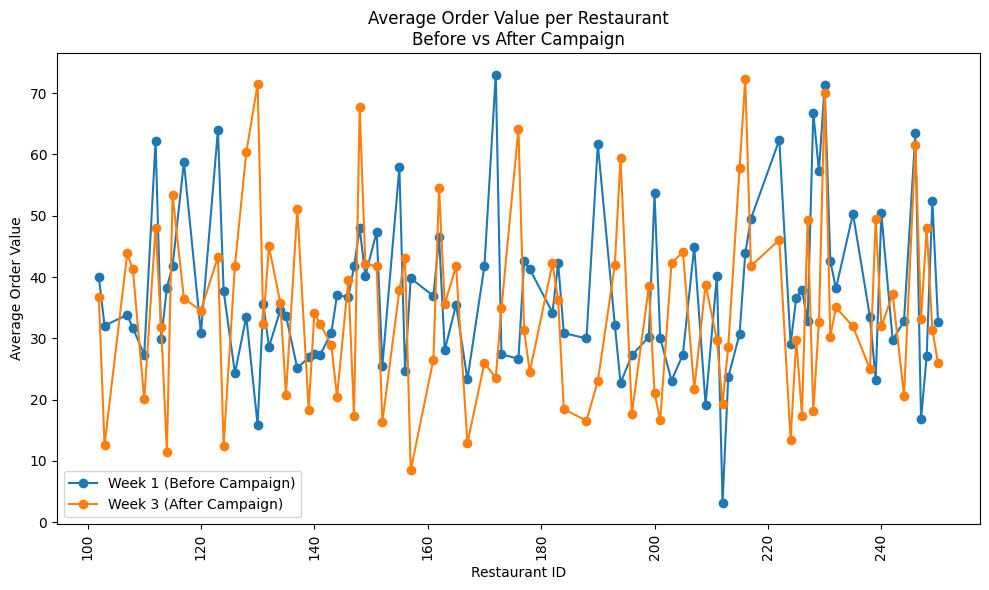

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(
    paired_df.index,
    paired_df['Week1_OrderValue'],
    marker='o',
    label='Week 1 (Before Campaign)'
)

plt.plot(
    paired_df.index,
    paired_df['Week3_OrderValue'],
    marker='o',
    label='Week 3 (After Campaign)'
)

plt.title('Average Order Value per Restaurant\nBefore vs After Campaign')
plt.xlabel('Restaurant ID')
plt.ylabel('Average Order Value')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


###  Business Insight Summary

The campaign shows a **moderate positive impact on Average Order Value (AOV)** across many restaurants, with several outlets demonstrating clear post-campaign improvements. However, the results are **inconsistent**, as some restaurants experienced minimal change or even a decline in AOV.

This variation indicates that the campaign was **effective but not universally optimized**. High-performing restaurants likely leveraged better pricing, bundling, or upselling strategies, while lower-performing ones may have been affected by over-discounting or weak offer positioning.

**Key Insight:**
A single, uniform campaign does not yield consistent results across all restaurants.

**Recommendation:**
Adopt a **segmented and data-driven campaign approach**, replicating best practices from high-performing restaurants and refining promotional strategies for underperforming ones to maximize overall revenue impact.


### ROI analysis


In [ ]:
paired_df['Incremental_Revenue'] = (
    paired_df['Week3_OrderValue'] - paired_df['Week1_OrderValue']
)

total_incremental_revenue = paired_df['Incremental_Revenue'].sum()
total_incremental_revenue



np.float64(-207.13)

**here campaign cost have not found**